## Preparação de Dados

In [1]:
from __future__ import division

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Analisando dados das Olimpíadas de Londres

In [4]:
sdir = 'http://papaleguas.icomp.ufam.edu.br/~marco/downloads/'
londres = pd.read_csv(sdir + 'london12.csv')

In [5]:
londres.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
3,3,24,NaN,NaN,M,0,Boxing
4,4,26,178.0,85.0,F,0,Athletics


Acessando dados de uma instância:

In [6]:
londres.iloc[0]

ID           0
Age         23
Height     170
Weight      60
Sex          M
Total        0
Sport     Judo
Name: 0, dtype: object

Contando os valores nominais em um atributo -- Quantas medalhas foram distribuídas por atletas?

In [7]:
londres.Total.value_counts()

0    9891
1     457
2      28
3       4
4       3
5       1
Name: Total, dtype: int64

Uma forma de obter os mesmos valores, em percentual, é via codificação em Python:

In [3]:
counts = londres.Total.value_counts().values
pcounts = 100*counts/counts.sum()
for i, v in enumerate(pcounts):
    print ('%d: %7.2f'%(i, v))

NameError: name 'londres' is not defined

O Pandas oferece vários meios de obter estatísticas básicas sobre os dados:

In [13]:
londres.describe()

,ID,Age,Height,Weight,Total
count,10384.000000,10384.000000,9823.000000,9104.000000,10384.000000
mean,5191.500000,26.068856,176.907869,72.852812,0.052196
std,2997.746932,5.440561,11.295433,16.067462,0.250149
min,0.000000,13.000000,132.000000,36.000000,0.000000
25%,2595.750000,22.000000,169.000000,61.000000,0.000000
50%,5191.500000,25.000000,177.000000,70.000000,0.000000
75%,7787.250000,29.000000,185.000000,81.000000,0.000000
max,10383.000000,71.000000,221.000000,218.000000,5.000000


#### Indexação condicional/booleana

Quem é o atleta com 71 anos?

In [14]:
#londres[londres.Age==71]    # colunas na forma df.col
londres[londres['Age']==71]  # colunas na forma df['col']

,ID,Age,Height,Weight,Sex,Total,Sport
3758,3758,71,168.0,61.0,M,0,Equestrian


Quem foi a atleta mais velha em Londres?

In [15]:
londres[londres.Sex=='F'].sort_values(['Age'], ascending = False).head()

,ID,Age,Height,Weight,Sex,Total,Sport
6495,6495,57,173.0,63.0,F,0,Equestrian
6849,6849,54,168.0,54.0,F,0,Equestrian
488,488,54,157.0,60.0,F,0,Shooting
9211,9211,52,160.0,50.0,F,1,Rowing
4626,4626,51,170.0,65.0,F,1,Equestrian


Obtenha todas as mulheres que lutam Judô usando uma condição composta:

In [16]:
londres[(londres.Sex=='F')&(londres.Sport=='Judo')].head()

,ID,Age,Height,Weight,Sex,Total,Sport
34,34,28,NaN,62.0,F,0,Judo
108,108,21,178.0,78.0,F,1,Judo
312,312,23,175.0,78.0,F,0,Judo
318,318,26,174.0,70.0,F,1,Judo
328,328,28,162.0,57.0,F,0,Judo


#### Pandas como interface OO para pyplot

Qual a relação observada nos atletas, em termos de peso e altura?

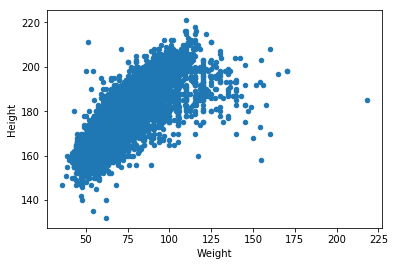

In [17]:
londres.plot(kind='scatter', y='Height', x='Weight')

Qual a idade do atleta de maior peso?

In [18]:
londres[londres.Weight>200]

,ID,Age,Height,Weight,Sex,Total,Sport
1096,1096,25,185.0,218.0,M,0,Judo


#### Lidando com _missing_ data

Quantas instâncias faltam de Altura e Peso?

In [19]:
londres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 7 columns):
ID        10384 non-null int64
Age       10384 non-null int64
Height    9823 non-null float64
Weight    9104 non-null float64
Sex       10384 non-null object
Total     10384 non-null int64
Sport     10384 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 568.0+ KB


In [20]:
(10384-9823, 10384-9104)

(561, 1280)

In [16]:
# some o nro de vezes que o campo altura eh nulo (missing)
sum(londres.Height.isnull())

561

#### Aplicar função em linhas/colunas e o método _fillna()_

Quantas instâncias faltam de todos os atributos, incluindo Altura e Peso?

In [21]:
londres.apply(lambda col: sum(col.isnull()), axis = 0)

ID           0
Age          0
Height     561
Weight    1280
Sex          0
Total        0
Sport        0
dtype: int64

Em quantas linhas faltam tanto os valores de Height quanto Weight:

In [22]:
lines = londres.apply(lambda row: sum(row.isnull()), axis = 1)

In [23]:
# usando sintaxe do Numpy -- (lines>1) = vetor de booleanos onde lines[i] é True se seu valor eh > 1
(lines>1).sum()

495

Atletas com peso faltantes foram tomados de forma aleatória, em relação à altura?

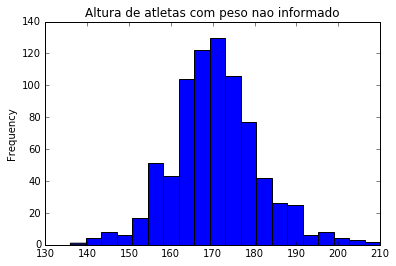

In [20]:
londres[londres.Weight.isnull()].Height.plot(kind='hist', bins=20, 
                                             title = 'Altura de atletas com peso nao informado')

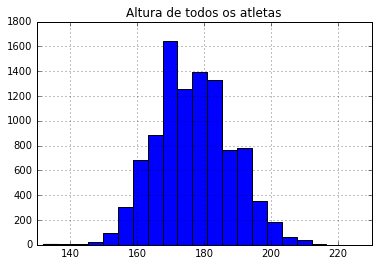

In [21]:
londres.Height.hist(bins=20)
plt.title('Altura de todos os atletas')

Ao comparar as distribuições de altura dos atletas com peso não informado com todos os atletas, notamos que o primeiro grupo tem média cerca de dez centímetros menor para uma mesma variância em geral. Logo, foram removidos atletas mais baixos que a média da população.

Apesar de não ser uma boa ideia (uma vez que você acabou de ver que os dados faltantes não parecem ter sido tomados de forma aleatória na população), substitua as alturas e pesos faltantes por suas médias, usando _fillna_():

In [22]:
avgh = londres.Height.mean()
avgw = londres.Weight.mean()

In [23]:
# Note uso de inplace para garantir que mudanca sera feita no dataframe
londres.Height.fillna(avgh, inplace=True) 
londres.Weight.fillna(avgh, inplace=True)

In [24]:
londres.apply(lambda col: sum(col.isnull()), axis = 0)

ID        0
Age       0
Height    0
Weight    0
Sex       0
Total     0
Sport     0
dtype: int64

Como esperado, não há mais dados faltantes.

#### Formas mais sofisticadas de verificar correlação de dados

Entre os atletas, como a altura dos homens se compara com a das mulheres?

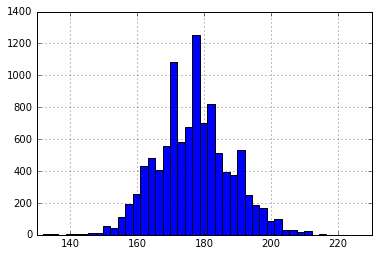

In [25]:
# primeiro, vamos obter a distribuicao global
londres.Height.hist(bins = 40)

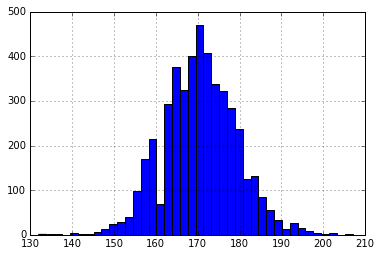

In [26]:
# agora, apenas para mulheres
londres[londres.Sex=='F'].Height.hist(bins = 40)

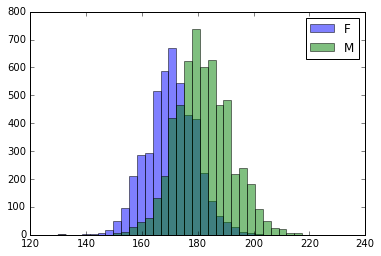

In [27]:
# eh possivel comparar as distribuicoes para homens e mulheres em um gráfico só
bins = np.linspace(130,240,40)
plt.hist(londres[londres.Sex=='F'].Height, bins, alpha=0.5, label='F')
plt.hist(londres[londres.Sex=='M'].Height, bins, alpha=0.5, label='M')
plt.legend()

Fica claro que homens tem altura maior. Abaixo, usamos o teste-t para checar se o ganho em altura é significativo, tendo por base um par de amostras de 30 atletas

In [28]:
from scipy import stats

In [29]:
stats.ttest_ind(londres[londres.Sex=='F'].Height.sample(30), 
               londres[londres.Sex=='M'].Height.sample(30))

Ttest_indResult(statistic=-5.380227009622316, pvalue=1.3955473459138595e-06)

Como o p-value é menor que 5%, dizemos que a diferença entre as alturas é significativa. Ou seja, podemos esperar que em cada 100 amostras de pares de 30 atletas, em menos de 5% delas (de fato, em menos de 0.002% delas), mulheres terão altura média maior.

Entre os atletas que ganharam medalhas, como se distribuiram as medalhas quando comparamos homens e mulheres?

In [30]:
pd.crosstab(londres.Sex, londres[londres.Total>0].Total)

Total,1.0,2.0,3.0,4.0,5.0
Sex,,,,,
F,210,19,2,2,0
M,247,9,2,1,1


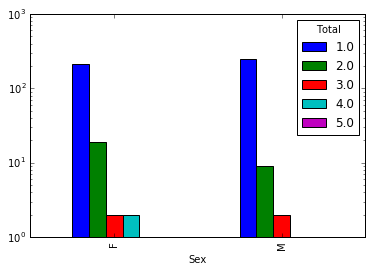

In [31]:
# os mesmos dados vistos como barras com eixo Y dado em base logaritmica
pd.crosstab(londres.Sex, londres[londres.Total>0].Total).plot(kind='bar', 
                                                              logy = True)

#### Mais cruzamento de dados

É verdade que esportes como Natação ('Swimming') e Ginástica Artística ('Gymnastics - Artistic') tem praticantes mais jovens (<= 24 anos) que esportes como Hipismo ('Equestrian') e Esgrima ('Fencing')?

_Primeiro, vamos criar um atributo para indicar se atleta é jovem:_

In [32]:
londres['AgeCat'] = londres['Age'].apply(lambda age: 'JOVEM' if age<=24 else 'MADURO')

In [33]:
londres.head()

,ID,Age,Height,Weight,Sex,Total,Sport,AgeCat
0,0,23,170.000000,60.000000,M,0,Judo,JOVEM
1,1,33,193.000000,125.000000,M,0,Athletics,MADURO
2,2,30,187.000000,76.000000,M,0,Athletics,MADURO
3,3,24,176.907869,176.907869,M,0,Boxing,JOVEM
4,4,26,178.000000,85.000000,F,0,Athletics,MADURO


Agora filtramos a base para termos apenas atletas dos esportes que queremos comparar.

In [34]:
londres_sports = londres[londres.Sport.isin(['Swimming', 
                                             'Gymnastics - Artistic', 
                                             'Equestrian', 
                                             'Fencing'])]

Agora podemos compará-los.

In [35]:
pd.crosstab(londres_sports.Sport, 
            londres.AgeCat, margins = True)

AgeCat,JOVEM,MADURO,All
Sport,,,
Equestrian,12,179,191
Fencing,88,147,235
Gymnastics - Artistic,130,52,182
Swimming,667,240,907
All,897,618,1515


Melhor ver os dados como percentuais:

In [36]:
pd.crosstab(londres_sports.Sport, 
            londres.AgeCat, margins = True).apply(lambda v: v/v[-1], axis = 1)

AgeCat,JOVEM,MADURO,All
Sport,,,
Equestrian,0.062827,0.937173,1.0
Fencing,0.374468,0.625532,1.0
Gymnastics - Artistic,0.714286,0.285714,1.0
Swimming,0.735391,0.264609,1.0
All,0.592079,0.407921,1.0


E, efetivamente, nadadores e ginastas mais jovens dominam seus esportes, o contrário do observado em hipismo e esgrima.

#### Tabelas pivô

Mostre altura média de homens e mulheres que jogam basquetebol ('Basketball') e fazem ginástica artística ('Gymnastics - Artistic'):

In [37]:
londresBG = londres[londres.Sport.isin(['Basketball', 'Gymnastics - Artistic'])]
londresBGpt = londresBG.pivot_table(values = ['Height'], 
                                    index = ['Sex', 'Sport'], 
                                    aggfunc = np.mean)
londresBGpt

Height
Sex Sport                            
F   Basketball             184.116970
    Gymnastics - Artistic  156.168080
M   Basketball             200.338346
    Gymnastics - Artistic  166.943820

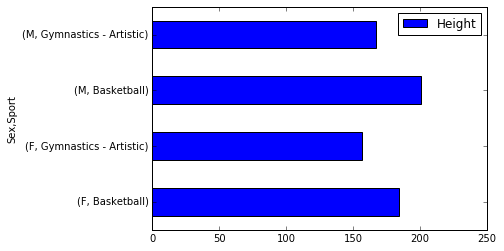

In [38]:
londresBGpt.plot(kind = 'barh')

#### Usando milti-índices

No dataframe anterior, podemos notar que o índice é composto por sexo e esporte. Assim, para acessar um atleta por seu sexo e esporte, basta usar o método loc com as duas informações. Por exemplo, qual a altura média das mulheres que jogam Basquete?

In [39]:
londresBGpt.loc[('F', 'Basketball')].Height

184.11696962710565

Ao remover dados faltantes, optamos por trocá-los por médias globais. Isso não faz muito sentido. Vamos corrigir isso. Primeiro, vamos ler novamente a base para retomar os dados faltantes originais.

In [40]:
londres = pd.read_csv(sdir + 'london12.csv')

Troque os pesos dos atletas com pesos faltantes pelo peso médio dos atletas que praticam o mesmo esporte que eles, de acordo com o seu sexo.

Primeiro, vamos obter as médias:

In [41]:
londrespt = londres.pivot_table(values = ['Weight'], 
                                index = ['Sex', 'Sport'], 
                                aggfunc = np.mean)
londrespt.head(10)

Weight
Sex Sport                          
F   Archery               63.087719
    Athletics             60.530435
    Athletics, Triathlon  60.000000
    Badminton             60.759494
    Basketball            76.140741
    Beach Volleyball      68.782609
    Boxing                      NaN
    Canoe Slalom          59.809524
    Canoe Sprint          66.341463
    Cycling - BMX         65.461538

Podemos agora fazer as mudanças:

In [42]:
#for i, row in londres[londres.Weight.isnull()].iterrows():
#    print i, (row.Sex, row.Sport), londrespt.loc[(row.Sex, row.Sport)].Weight

In [43]:
for i, row in londres[londres.Weight.isnull()].iterrows():
    londres.loc[i, 'Weight'] = londrespt.loc[(row.Sex, row.Sport), 'Weight']

In [44]:
londres.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
3,3,24,NaN,NaN,M,0,Boxing
4,4,26,178.0,85.0,F,0,Athletics


#### Ordenação e agrupamento de dados

Quais os dez atletas mais altos?

In [45]:
londres.sort_values(['Height'], ascending = False).head(10)

,ID,Age,Height,Weight,Sex,Total,Sport
10383,10383,24,221.0,110.0,M,0,Basketball
6424,6424,23,218.0,115.0,M,0,Volleyball
6339,6339,26,216.0,116.0,M,0,Basketball
5972,5972,26,216.0,110.0,M,0,Basketball
1707,1707,29,216.0,109.0,M,0,Basketball
9824,9824,33,215.0,110.0,M,0,Basketball
7530,7530,32,215.0,115.0,M,0,Basketball
6467,6467,27,215.0,122.0,M,0,Basketball
9446,9446,20,213.0,111.0,M,0,Basketball
5739,5739,24,212.0,101.0,M,0,Handball


Quais os dez esportes com os atletas mais altos, considerando a maior altura?

In [46]:
londres.groupby(['Sport'])['Height'].max().sort_values(ascending = False).head(10)

Sport
Basketball          221.0
Volleyball          218.0
Handball            212.0
Beach Volleyball    210.0
Athletics           209.0
Archery             208.0
Rowing              208.0
Swimming            208.0
Tennis              206.0
Water Polo          205.0
Name: Height, dtype: float64

#### Merging

In [47]:
londres = pd.read_csv(sdir + 'london12.csv')

In [48]:
londres2 = pd.read_csv(sdir + 'london12_adv.csv')

In [49]:
londres.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
3,3,24,NaN,NaN,M,0,Boxing
4,4,26,178.0,85.0,F,0,Athletics


In [50]:
londres2.head()

,ID,Name,Country,Date of birth,Place of birth,Gold,Silver,Bronze,Event
0,0,Lamusi A,China,6/2/1989,NEIMONGGOL,0,0,0,Men's -60kg
1,1,A G Kruger,USA,2/18/1979,Sheldon,0,0,0,Men's Hammer Throw
2,2,Jamale Aarrass,France,11/15/1981,BEZONS,0,0,0,Men's 1500m
3,3,Abdelhak Aatakni,Morocco,2/9/1988,AIN SEBAA (MAR),0,0,0,Men's Light Welter (64kg)
4,4,Maria Abakumova,Russia,1/15/1986,STAVROPOL REGION,0,0,0,Women's Javelin Throw


Inclua _país_ e _data de nascimento_ em seu dataframe

In [51]:
londres3 = londres.merge(londres2[['ID', 'Country', 'Date of birth']], on = 'ID')
londres3.head()

,ID,Age,Height,Weight,Sex,Total,Sport,Country,Date of birth
0,0,23,170.0,60.0,M,0,Judo,China,6/2/1989
1,1,33,193.0,125.0,M,0,Athletics,USA,2/18/1979
2,2,30,187.0,76.0,M,0,Athletics,France,11/15/1981
3,3,24,NaN,NaN,M,0,Boxing,Morocco,2/9/1988
4,4,26,178.0,85.0,F,0,Athletics,Russia,1/15/1986


In [52]:
londres3.dtypes

ID                 int64
Age                int64
Height           float64
Weight           float64
Sex               object
Total              int64
Sport             object
Country           object
Date of birth     object
dtype: object

Quais os atletas nascidos em agosto?

Para responder isso, primeiro precisamos convertes strings com datas em timestamps (Python datetime) em pandas:

In [53]:
londres3['Date of birth'] = pd.to_datetime(londres3['Date of birth'], infer_datetime_format=True)

In [54]:
londres3.dtypes

ID                        int64
Age                       int64
Height                  float64
Weight                  float64
Sex                      object
Total                     int64
Sport                    object
Country                  object
Date of birth    datetime64[ns]
dtype: object

Agora podemos acessar o campo mês do timestamp:

In [55]:
londres3[londres3['Date of birth'].dt.month == 8].head()

,ID,Age,Height,Weight,Sex,Total,Sport,Country,Date of birth
6,6,30,182.0,73.0,F,0,Rowing,Argentina,1981-08-17
13,13,28,171.0,64.0,F,0,Water Polo,Italy,1983-08-22
32,32,27,179.0,82.0,M,0,Fencing,Iran,1984-08-11
33,33,20,160.0,62.0,F,1,Diving,Canada,1991-08-23
34,34,28,NaN,62.0,F,0,Judo,Cuba,1983-08-26


#### Engenharia de Atributos

In [56]:
londres = pd.read_csv(sdir + 'london12.csv')

In [57]:
londres = londres.dropna()

Crie um novo campo na tabela, o BMI, ou seja, o índice de massa corpórea. Ele corresponde ao $peso * altura^2$, com a altura dada em metros.

In [58]:
londres['BMI'] = londres['Weight'] * (londres['Height']/100)**2

In [59]:
londres.BMI.head()

0    173.4000
1    465.6125
2    265.7644
4    269.3140
5    264.9920
Name: BMI, dtype: float64

#### Anomalias

Vc percebe anomalias em BMI?

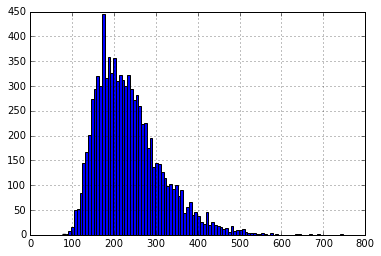

In [60]:
londres.BMI.hist(bins=100)

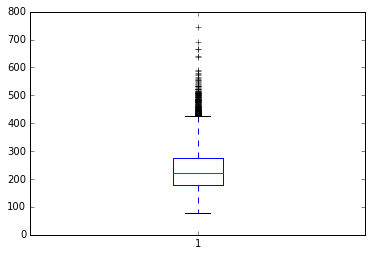

In [61]:
_ = plt.boxplot(londres.BMI)

Será que uma suavização remove os outliers?

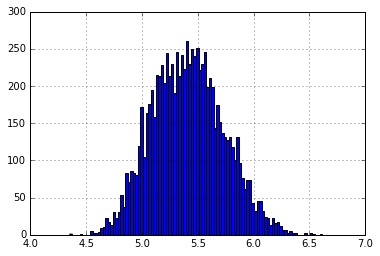

In [62]:
novoBMI = np.log(londres.BMI)
novoBMI.hist(bins=100)

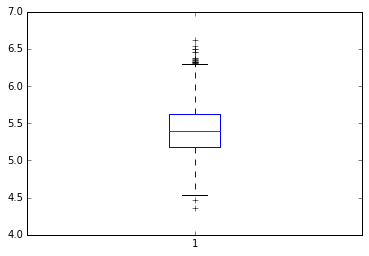

In [63]:
_ = plt.boxplot(novoBMI)

Removendo campo BMI

In [64]:
londres.drop('BMI', axis=1, inplace = True)
#londres.drop(columns = ['BMI'], inplace = True)  # for pandas version > 0.20
londres.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
4,4,26,178.0,85.0,F,0,Athletics
5,5,27,182.0,80.0,M,0,Handball


#### Normalização

Normalize os dados de londres, exceto Total. Numéricos devem ser padronizados e simbólicos trocados por um código apropriado de categoria.

In [65]:
londresn = londres3.dropna().copy(deep=True)

In [66]:
londresn.head()

,ID,Age,Height,Weight,Sex,Total,Sport,Country,Date of birth
0,0,23,170.0,60.0,M,0,Judo,China,1989-06-02
1,1,33,193.0,125.0,M,0,Athletics,USA,1979-02-18
2,2,30,187.0,76.0,M,0,Athletics,France,1981-11-15
4,4,26,178.0,85.0,F,0,Athletics,Russia,1986-01-15
5,5,27,182.0,80.0,M,0,Handball,France,1984-09-06


In [67]:
for c in ['Age', 'Height', 'Weight']:
    londresn[c] = (londresn[c] - londresn[c].mean())/londresn[c].std()

In [68]:
for c in ['Sport', 'Sex', 'Country']:
    londresn[c] = londresn[c].astype('category').cat.codes

In [69]:
londresn.drop(['ID', 'Date of birth'], axis = 1, inplace = True)
londresn.head()

,Age,Height,Weight,Sex,Total,Sport,Country
0,-0.616112,-0.665641,-0.800243,1,0,23,38
1,1.215484,1.387471,3.244868,1,0,1,184
2,0.666005,0.851876,0.195477,1,0,1,61
4,-0.066633,0.048485,0.755569,0,0,1,147
5,0.116527,0.405548,0.444407,1,0,21,61


Estamos quase lá. Embora os dados já estejam em formato numérico preferido por muitos métodos, eles ainda não estão tão bons para classificação. Por exemplo, o campo _Country_ tem valores numéricos representando cada país. Isso indica para o classificador que países são grandezas numéricas, como a idade, que podem ser comparadas diretamente. Não é o caso. Ele devia entender um país como um tipo de categoria de forma que o país 38 não é menor que o país 184. Eles são meramente diferentes! 

Para fazer isso, precisamos trocar campos categoricos como Country por vários campos binários, tantos quantos forem o número de países. Em pandas, podemos fazer isso com a função get_dummies:

In [70]:
country_dummies = pd.get_dummies(londresn['Country'], prefix = 'C')
country_dummies.head()

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_186,C_187,C_188,C_189,C_190,C_191,C_192,C_193,C_194,C_195
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Neste exemplo, *get_dummies* trasnformou Country em 196 atributos binários: C_0, C_1, ..., C_195. O atributo C_i é 1 apenas para atletas do i-ésimo país. Bom, podemos agora incorporar esses novos campos ao nosso dataframe em substituição ao campo Country:

In [71]:
londresn = londresn.drop('Country', axis = 1).join(country_dummies)
londresn.head()

,Age,Height,Weight,Sex,Total,Sport,C_0,C_1,C_2,C_3,...,C_186,C_187,C_188,C_189,C_190,C_191,C_192,C_193,C_194,C_195
0,-0.616112,-0.665641,-0.800243,1,0,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.215484,1.387471,3.244868,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.666005,0.851876,0.195477,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.066633,0.048485,0.755569,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.116527,0.405548,0.444407,1,0,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora basta remover o total das colunas que queremos usar para treino:

In [72]:
colunas = list(londresn.columns.values)
colunas.remove('Total')
print colunas

['Age', 'Height', 'Weight', 'Sex', 'Sport', 'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18', 'C_19', 'C_20', 'C_21', 'C_22', 'C_23', 'C_24', 'C_25', 'C_26', 'C_27', 'C_28', 'C_29', 'C_30', 'C_31', 'C_32', 'C_33', 'C_34', 'C_35', 'C_36', 'C_37', 'C_38', 'C_39', 'C_40', 'C_41', 'C_42', 'C_43', 'C_44', 'C_45', 'C_46', 'C_47', 'C_48', 'C_49', 'C_50', 'C_51', 'C_52', 'C_53', 'C_54', 'C_55', 'C_56', 'C_57', 'C_58', 'C_59', 'C_60', 'C_61', 'C_62', 'C_63', 'C_64', 'C_65', 'C_66', 'C_67', 'C_68', 'C_69', 'C_70', 'C_71', 'C_72', 'C_73', 'C_74', 'C_75', 'C_76', 'C_77', 'C_78', 'C_79', 'C_80', 'C_81', 'C_82', 'C_83', 'C_84', 'C_85', 'C_86', 'C_87', 'C_88', 'C_89', 'C_90', 'C_91', 'C_92', 'C_93', 'C_94', 'C_95', 'C_96', 'C_97', 'C_98', 'C_99', 'C_100', 'C_101', 'C_102', 'C_103', 'C_104', 'C_105', 'C_106', 'C_107', 'C_108', 'C_109', 'C_110', 'C_111', 'C_112', 'C_113', 'C_114', 'C_115', 'C_116', 'C_117', 'C_1

E obter a matrix X e o vetor y correspondentes:

In [73]:
X = londresn[colunas].values
y = londresn['Total'].values

In [74]:
X

array([[-0.61611165, -0.66564113, -0.80024296, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21548399,  1.38747088,  3.24486785, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.6660053 ,  0.85187644,  0.19547662, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.11652661,  0.22701627,  0.88003384, ...,  0.        ,
         0.        ,  0.        ],
       [-0.24979252, -0.39784391, -0.67577801, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43295208,  3.88691157,  2.31138074, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
y

array([0, 0, 0, ..., 0, 0, 0])

#### Classificação

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [78]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [79]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
clf.score(X_test, y_test) 

0.9457964601769911

E então? foi um grande resultado?

In [81]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[855,   0,   0,   0],
       [ 46,   0,   0,   0],
       [  2,   0,   0,   0],
       [  1,   0,   0,   0]])

Não muito de acordo com a matriz de confusão. A floresta simplesmente aprendeu que erra menos ao dizer que todos os atletas __não__ vão ganhar medalha.